In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
import geopandas as gpd
import contextily as ctx

from importlib import reload
import asp_plot.altimetry
reload(asp_plot.altimetry)

from asp_plot.altimetry import Altimetry

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]
try:
    aligned_dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m*pc_align*.tif"))[0]
except:
    aligned_dem_fn = None

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "EPSG:32604"

ctx_kwargs = {
    "crs": map_crs,
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [3]:
try:
    atl06sr = gpd.read_parquet(os.path.join(icesat_directory, "atl06sr_defaults_all.parquet"))
    atl06sr_filtered = gpd.read_parquet(os.path.join(icesat_directory, "atl06sr_defaults_filtered.parquet"))

    icesat = Altimetry(
        dem_fn=dem_fn, 
        aligned_dem_fn=aligned_dem_fn,
        atl06sr=atl06sr,
        atl06sr_filtered=atl06sr_filtered
    )
except:
    print("No existing ATL06 files found. You'll need to re-request")
    icesat = Altimetry(dem_fn=dem_fn, aligned_dem_fn=aligned_dem_fn)

No existing ATL06 files found. You'll need to re-request


In [4]:
if icesat.atl06sr is None:
    icesat.pull_atl06sr(
        esa_worldcover=True,
        filename=os.path.join(icesat_directory, "atl06sr_defaults_all"),
        parms=None,
    )

icesat.atl06sr


ICESat-2 ATL06 request processing with parms:
{'poly': [{'lon': -156.83342896997698, 'lat': 71.26658548886508}, {'lon': -156.83342896997698, 'lat': 71.39688565394232}, {'lon': -156.40964712543294, 'lat': 71.39688565394232}, {'lon': -156.40964712543294, 'lat': 71.26658548886508}, {'lon': -156.83342896997698, 'lat': 71.26658548886508}], 'cnf': 4, 'samples': {'esa_worldcover': {'asset': 'esa-worldcover-10meter'}}}


n_fit_photons  spot        y_atc       x_atc  \
time                                                                          
2018-11-20 23:50:33.459589376             10     1 -4467.259766   7950044.5   
2018-11-20 23:50:33.527074048             15     3 -1218.220337   7950425.0   
2018-11-20 23:50:33.530016768             13     3 -1218.214722   7950445.0   
2018-11-20 23:50:33.532833792             11     3 -1218.210327   7950465.0   
2018-11-20 23:50:33.535680000             15     3 -1218.213501   7950485.0   
...                                      ...   ...          ...         ...   
2024-04-12 14:33:10.995255296             14     5  3226.183594  12120135.0   
2024-04-12 14:33:10.998089984             20     5  3226.091064  12120155.0   
2024-04-12 14:33:11.000924160             17     5  3225.997803  12120175.0   
2024-04-12 14:33:11.003757056             16     5  3225.908936  12120195.0   
2024-04-12 14:33:11.006588160             12     5  3225.833008  12120215.0   

                               rgt  gt     h_mean  dh_fit_dx  cycle   h_sigma  \
time                                                                            
2018-11-20 23:50:33.459589376  815  60   8.783496   0.002570      1  0.064915   
2018-11-20 23:50:33.527074048  815  40  12.821935   0.003775      1  0.027440   
2018-11-20 23:50:33.530016768  815  40  12.912689   0.004168      1  0.039577   
2018-11-20 23:50:33.532833792  815  40  13.087043   0.007202      1  0.045450   
2018-11-20 23:50:33.535680000  815  40  13.246701   0.002723      1  0.034577   
...                            ...  ..        ...        ...    ...       ...   
2024-04-12 14:33:10.995255296  381  20   3.464851  -0.001165     23  0.078120   
2024-04-12 14:33:10.998089984  381  20   3.431344  -0.003981     23  0.055120   
2024-04-12 14:33:11.000924160  381  20   3.488348   0.008699     23  0.055067   
2024-04-12 14:33:11.003757056  381  20   3.791667   0.021580     23  0.080167   
2024-04-12 14:33:11.006588160  381  20   3.951364   0.002545     23  0.146243   

                               pflags  region  rms_misfit  \
time                                                        
2018-11-20 23:50:33.459589376       0       3    0.134788   
2018-11-20 23:50:33.527074048       0       3    0.093223   
2018-11-20 23:50:33.530016768       0       3    0.099579   
2018-11-20 23:50:33.532833792       0       3    0.146518   
2018-11-20 23:50:33.535680000       0       3    0.131781   
...                               ...     ...         ...   
2024-04-12 14:33:10.995255296       0       5    0.264175   
2024-04-12 14:33:10.998089984       0       5    0.242453   
2024-04-12 14:33:11.000924160       0       5    0.223190   
2024-04-12 14:33:11.003757056       0       5    0.307677   
2024-04-12 14:33:11.006588160       0       5    0.428792   

                               w_surface_window_final  segment_id  \
time                                                                
2018-11-20 23:50:33.459589376                3.000000      396648   
2018-11-20 23:50:33.527074048                3.000000      396667   
2018-11-20 23:50:33.530016768                3.000000      396668   
2018-11-20 23:50:33.532833792                3.000000      396669   
2018-11-20 23:50:33.535680000                3.000000      396670   
...                                               ...         ...   
2024-04-12 14:33:10.995255296                3.000000      605068   
2024-04-12 14:33:10.998089984                3.000000      605069   
2024-04-12 14:33:11.000924160                3.000000      605070   
2024-04-12 14:33:11.003757056                3.000000      605071   
2024-04-12 14:33:11.006588160                3.139533      605072   

                                                  geometry  \
time                                                         
2018-11-20 23:50:33.459589376   POINT (-156.68342 71.2681)   
2018-11-20 23:50:33.527074048  POINT (-156.77463 71.26773)   
2018-11-2

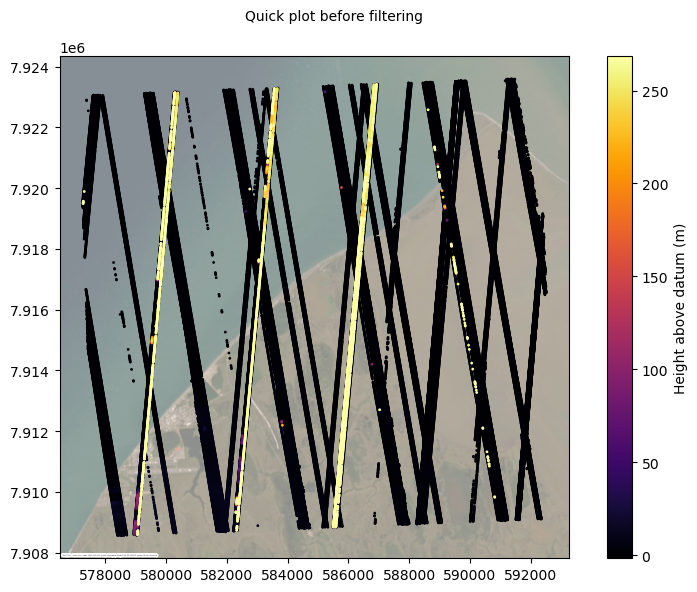

In [5]:
icesat.plot_atl06sr(
    title="Quick plot before filtering",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=False,
    **ctx_kwargs
)

In [6]:
# Filter data down
if icesat.atl06sr_filtered is None:
    icesat.filter_atl06sr(
        h_sigma_quantile=0.95,
        mask_worldcover_water=True,
        select_months=[4],
        select_years=[2022],
        filename=os.path.join(icesat_directory, "atl06sr_defaults_filtered"),
    )

icesat.atl06sr_filtered

n_fit_photons  spot        y_atc       x_atc  \
time                                                                          
2022-04-17 01:15:56.210849792             93     1  3311.713135  12110909.0   
2022-04-17 01:15:56.213662464            233     1  3311.738525  12110929.0   
2022-04-17 01:15:56.467528960            397     1  3309.855713  12112730.0   
2022-04-17 01:15:56.470364928            370     1  3309.832031  12112750.0   
2022-04-17 01:15:56.473200128            368     1  3309.790283  12112770.0   
...                                      ...   ...          ...         ...   
2022-04-17 01:15:57.719849728             72     6 -3313.918701  12119394.0   
2022-04-17 01:15:57.722661120             85     6 -3313.976074  12119414.0   
2022-04-17 01:15:57.725475328             82     6 -3314.024170  12119434.0   
2022-04-17 01:15:57.733928704             48     6 -3314.069092  12119494.0   
2022-04-17 01:15:57.736751616             64     6 -3314.052002  12119514.0   

                               rgt  gt     h_mean  dh_fit_dx  cycle   h_sigma  \
time                                                                            
2022-04-17 01:15:56.210849792  381  10  -0.341876  -0.020158     15  0.054879   
2022-04-17 01:15:56.213662464  381  10  -0.466327   0.021334     15  0.014196   
2022-04-17 01:15:56.467528960  381  10  -0.324278   0.009540     15  0.007755   
2022-04-17 01:15:56.470364928  381  10  -0.193495   0.005028     15  0.007654   
2022-04-17 01:15:56.473200128  381  10  -0.114474   0.003891     15  0.006003   
...                            ...  ..        ...        ...    ...       ...   
2022-04-17 01:15:57.719849728  381  60  10.424692  -0.006849     15  0.018753   
2022-04-17 01:15:57.722661120  381  60  10.358472   0.000286     15  0.015511   
2022-04-17 01:15:57.725475328  381  60  10.315920  -0.002977     15  0.013112   
2022-04-17 01:15:57.733928704  381  60  10.386419   0.002325     15  0.027527   
2022-04-17 01:15:57.736751616  381  60  10.400764  -0.001354     15  0.019877   

                               pflags  region  rms_misfit  \
time                                                        
2022-04-17 01:15:56.210849792       0       5    0.183663   
2022-04-17 01:15:56.213662464       0       5    0.201344   
2022-04-17 01:15:56.467528960       0       5    0.154314   
2022-04-17 01:15:56.470364928       0       5    0.147074   
2022-04-17 01:15:56.473200128       0       5    0.115157   
...                               ...     ...         ...   
2022-04-17 01:15:57.719849728       0       5    0.153063   
2022-04-17 01:15:57.722661120       0       5    0.142104   
2022-04-17 01:15:57.725475328       0       5    0.117638   
2022-04-17 01:15:57.733928704       0       5    0.135503   
2022-04-17 01:15:57.736751616       0       5    0.141034   

                               w_surface_window_final  segment_id  \
time                                                                
2022-04-17 01:15:56.210849792                     3.0      604607   
2022-04-17 01:15:56.213662464                     3.0      604608   
2022-04-17 01:15:56.467528960                     3.0      604698   
2022-04-17 01:15:56.470364928                     3.0      604699   
2022-04-17 01:15:56.473200128                     3.0      604700   
...                                               ...         ...   
2022-04-17 01:15:57.719849728                     3.0      605031   
2022-04-17 01:15:57.722661120                     3.0      605032   
2022-04-17 01:15:57.725475328                     3.0      605033   
2022-04-17 01:15:57.733928704                     3.0      605036   
2022-04-17 01:15:57.736751616                     3.0      605037   

                                                  geometry  \
time                                                         
2022-04-17 01:15:56.210849792  POINT (-156.57677 71.35026)   
2022-04-17 01:15:56.213662464  POINT (-156.57684 71.35008)   
2022-04-1

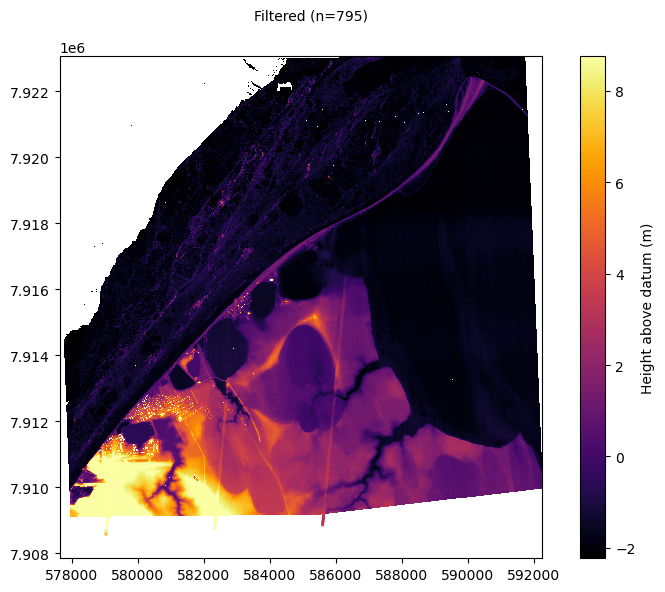

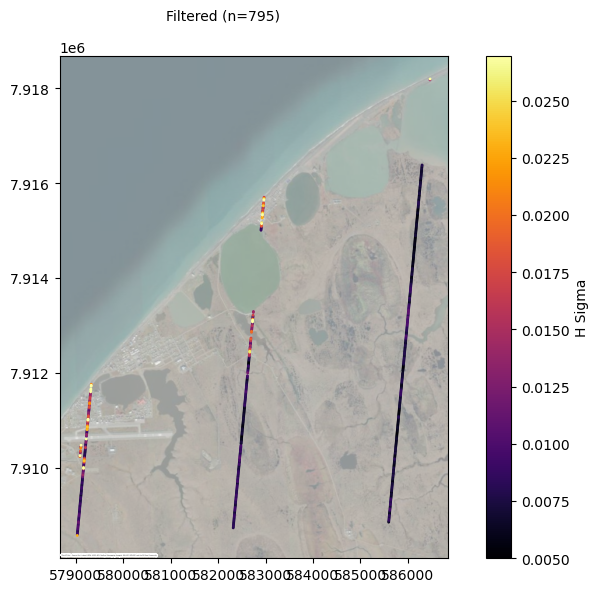

In [7]:
icesat.plot_atl06sr(
    title=f"Filtered (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    map_crs=map_crs,
    plot_dem=True,
    **ctx_kwargs
)

icesat.plot_atl06sr(
    title=f"Filtered (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    map_crs=map_crs,
    column_name="h_sigma",
    cbar_label="H Sigma",
    **ctx_kwargs
)

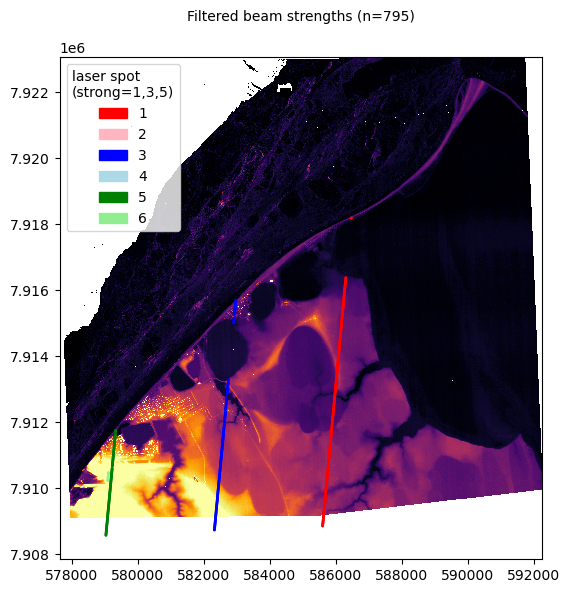

In [8]:
icesat.plot_atl06sr(
    title=f"Filtered beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    plot_beams=True,
    plot_dem=True,
    map_crs=map_crs,
    **ctx_kwargs
)


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



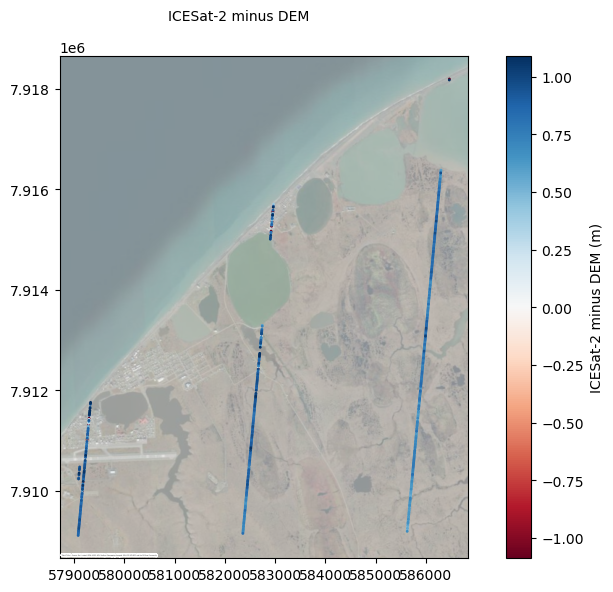

In [9]:
icesat.compare_atl06sr_to_dem(
    title="ICESat-2 minus DEM",
    **ctx_kwargs
)

In [11]:
# Previous mismatch indicates need for pc_align step
icesat.pc_align_dem_to_atl06sr(
    atl06sr_csv=os.path.join(icesat_directory, "atl06sr_defaults_filtered.csv"),
    output_prefix=os.path.join(directory, "pc_align/pc_align"),
)

--> Setting number of processing threads to: 4

Creating output directory: "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align".
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align-log-pc_align-08-04-2118-59675.txt
Will use datum (for CSV files): Geodetic Datum --> Name: WGS_1984  Spheroid: WGS 84  Semi-major axis: 6378137  Semi-minor axis: 6356752.3142451793  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=WGS84 +no_defs
Computing the bounding boxes of the reference and source points using 9000000 sample points.
Computation of bounding boxes took 11.4935 [s]
Reference points box: Origin: (-156.826, 71.2694) width: 0.401829 height: 0.124855
Source points box:    Origin: (-156.796, 71.2663) width: 0.219649 height: 0.0842568
Intersection reference box:  Origin: (-156.796, 71.2694) width: 0.219649 height: 0.0811688
Intersection source    box:  Origin: (-156.796, 71.26

In [55]:
icesat.generate_translated_dem(
    pc_align_output=os.path.join(directory, "pc_align/pc_align-trans_reference.tif"),
    dem_out_fn=dem_fn.replace(".tif", "_pc_align_translated"),
)

--> Setting number of processing threads to: 4
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo_ba_50ips_10matches_dg_weight_image__ortho_0.35m_mode_asp_mgm_spm_9_corr_7_rfne_15_cost_4_refdem_COP30/20220417_2252_1040010074793300_1040010075633C00-DEM_1m_pc_align_translated-log-point2dem-08-01-2254-17865.txt
The point cloud files must have an equal number of channels which must be 4 or 6 to be able to remove outliers.

Point cloud extent estimation: [..........................................] 0%
Point cloud extent estimation: [..........................................] 1%
Point cloud extent estimation: [..........................................] 2%
Point cloud extent estimation: [*.........................................] 3%
Point cloud extent estimation: [*.........................................] 4%
Point cloud extent estimation: [**........................................] 5%
Point cloud extent estimation: [**........

In [58]:
icesat.aligned_dem_fn = dem_fn.replace(".tif", "_pc_align_translated-DEM.tif")


Using aligned DEM for comparison.


Using aligned DEM for comparison.



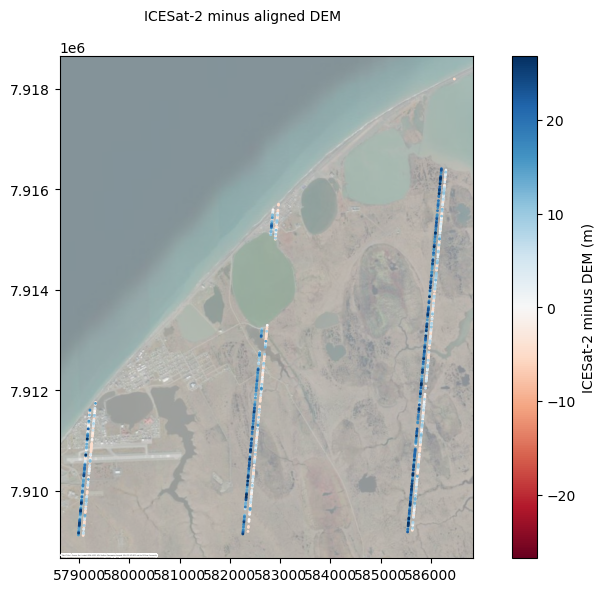

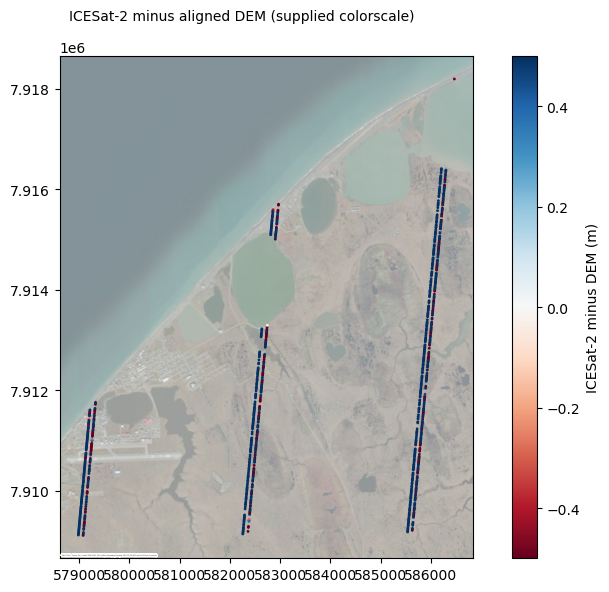

In [59]:
# Quickly compare the translated DEM to the ATL06 data
icesat.compare_atl06sr_to_dem(title = "ICESat-2 minus aligned DEM", use_aligned_dem=True, **ctx_kwargs)

icesat.compare_atl06sr_to_dem(title = "ICESat-2 minus aligned DEM (supplied colorscale)", clim=(-0.5, 0.5), use_aligned_dem=True, **ctx_kwargs)

In [61]:
# Gather a larger subset of data for validation
icesat.filter_atl06sr(
    h_sigma_quantile=0.95,
    mask_worldcover_water=False,
    select_months=[3, 4, 5],
    save_to_csv=False,
    save_to_parquet=False,
    filename=os.path.join(icesat_directory, "atl06sr_filtered_noWaterMask_MarchAprilMay_allTime_for_validation"),
)

n_fit_photons  spot       x_atc        y_atc  \
time                                                                    
2019-04-18 16:42:25.758            736     3   7951087.5  4860.481445   
2019-04-18 16:42:25.761            750     3   7951107.5  4860.437012   
2019-04-18 16:42:25.764            733     3   7951127.5  4860.357910   
2019-04-18 16:42:25.767            730     3   7951147.5  4860.274414   
2019-04-18 16:42:25.769            760     3   7951167.5  4860.208496   
...                                ...   ...         ...          ...   
2024-04-12 14:33:08.668             71     4  12106206.0    52.733665   
2024-04-12 14:33:09.709             71     3  12111129.0   -34.619816   
2024-04-12 14:33:10.657             10     2  12120435.0 -3207.792725   
2024-04-12 14:33:10.820             69     5  12118894.0  3225.696289   
2024-04-12 14:33:10.986             19     5  12120075.0  3226.351807   

                         w_surface_window_final  dh_fit_dx  pflags  cycle  \
time                                                                        
2019-04-18 16:42:25.758            5.799953e+20  -0.209321       0      3   
2019-04-18 16:42:25.761            1.031103e+21   0.211128       0      3   
2019-04-18 16:42:25.764            5.799953e+20  -0.316492       0      3   
2019-04-18 16:42:25.767            1.031103e+21   0.030006       0      3   
2019-04-18 16:42:25.769            1.031103e+21  -0.210451       0      3   
...                                         ...        ...     ...    ...   
2024-04-12 14:33:08.668            1.031103e+21  -1.398296       0     23   
2024-04-12 14:33:09.709            1.031103e+21   0.192848       0     23   
2024-04-12 14:33:10.657            5.091055e+01  -1.996348       0     23   
2024-04-12 14:33:10.820            1.031103e+21  -0.965957       0     23   
2024-04-12 14:33:10.986            1.265625e+01   0.003556       0     23   

                         rms_misfit  segment_id   h_sigma  rgt  gt  region  \
time                                                                         
2019-04-18 16:42:25.758   86.361397      396696  3.190147  312  30       3   
2019-04-18 16:42:25.761   84.909294      396697  3.105118  312  30       3   
2019-04-18 16:42:25.764   79.875534      396698  2.950737  312  30       3   
2019-04-18 16:42:25.767   79.317123      396699  2.936219  312  30       3   
2019-04-18 16:42:25.769   84.042885      396700  3.049138  312  30       3   
...                             ...         ...       ...  ...  ..     ...   
2024-04-12 14:33:08.668   51.961163      604372  7.032969  381  30       5   
2024-04-12 14:33:09.709   62.546719      604618  7.448154  381  40       5   
2024-04-12 14:33:10.657   10.070227      605083  3.213951  381  50       5   
2024-04-12 14:33:10.820   60.164772      605006  7.245250  381  20       5   
2024-04-12 14:33:10.986    0.199547      605065  0.052944  381  20       5   

                            h_mean  esa_worldcover.file_id  \
time                                                         
2019-04-18 16:42:25.758  -1.992327            184683593728   
2019-04-18 16:42:25.761  -2.542358            184683593728   
2019-04-18 16:42:25.764  -0.940236            184683593728   
2019-04-18 16:42:25.767   0.417156            184683593728   
2019-04-18 16:42:25.769   0.106438            184683593728   
...                            ...                     ...   
2024-04-12 14:33:08.668  -1.576862            227633266688   
2024-04-12 14:33:09.709   1.662242            227633266688   
2024-04-12 14:33:10.657 -25.488793            227633266688   
2024-04-12 14:33:10.820  11.803825            227633266688   
2024-04-12 14:33:10.986   3.312368            227633266688   

                         esa_worldcover.flags  esa_worldcover.value  \
time                                                                  
2019-04-18 16:42:25.758                     0                  80.0   
2019-04-18 16:42:25.761               


Comparing ATL06 to DEM. Gross mismatches or spatial trends may indicate a need for pc_align step.



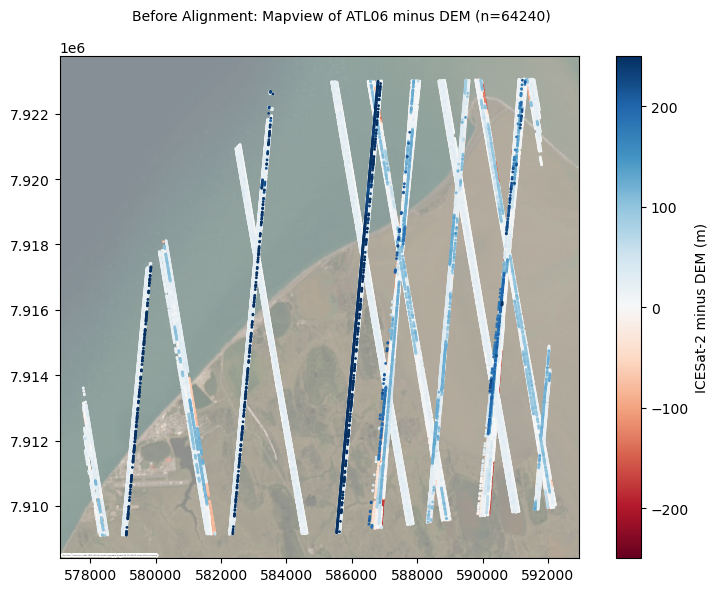

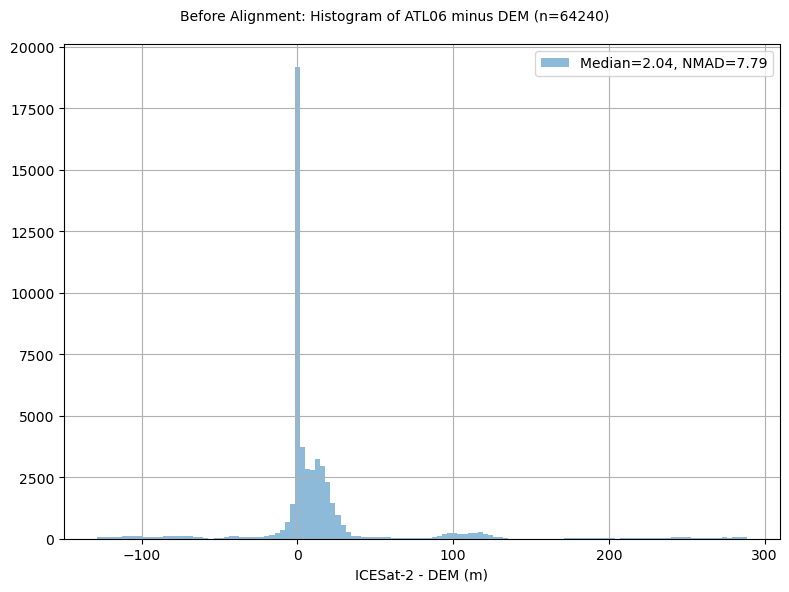

In [62]:
# Validate (before)
icesat.compare_atl06sr_to_dem(title=f"Before Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})", **ctx_kwargs)
icesat.histogram(title=f"Before Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})")


Using aligned DEM for comparison.



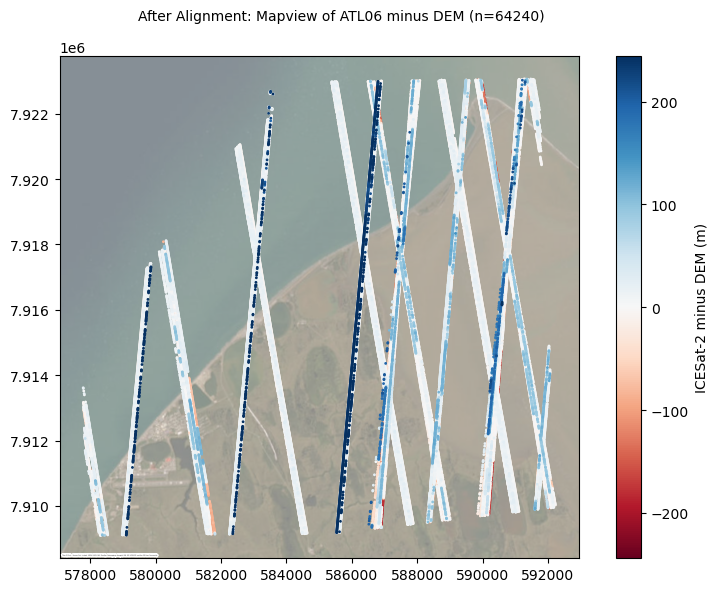

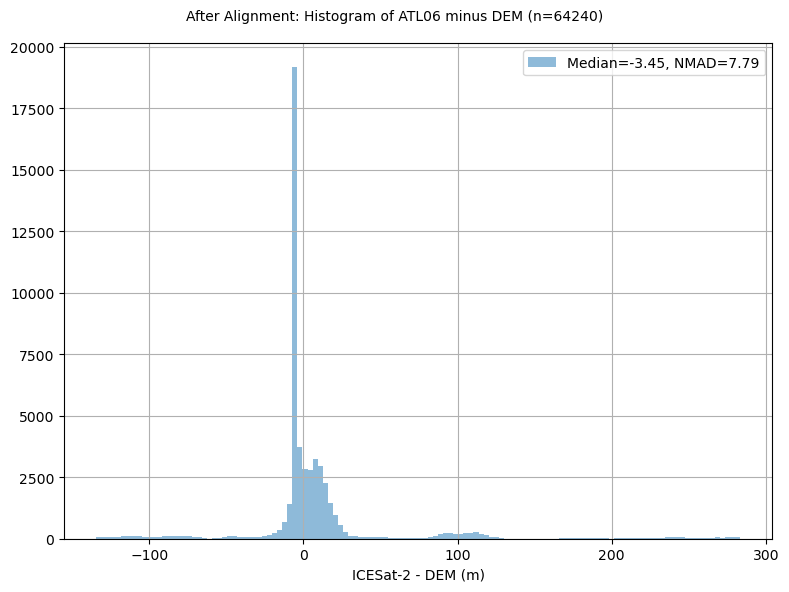

In [63]:
# Validate (after)
icesat.compare_atl06sr_to_dem(title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})", use_aligned_dem=True, **ctx_kwargs)
icesat.histogram(title=f"After Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})")


Using aligned DEM for comparison.



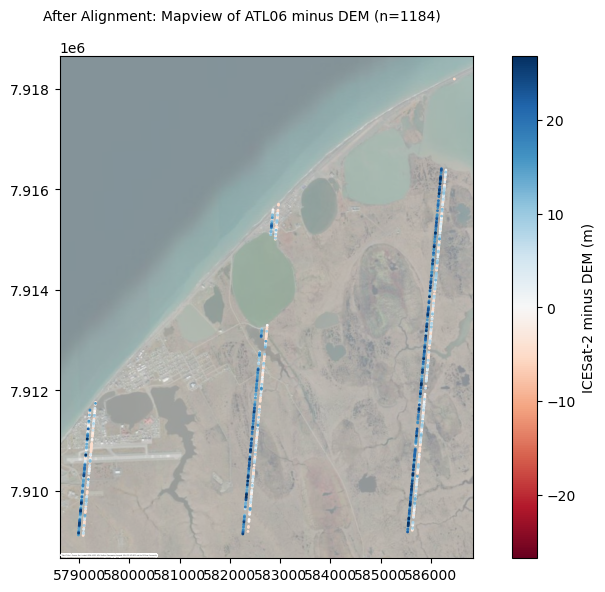

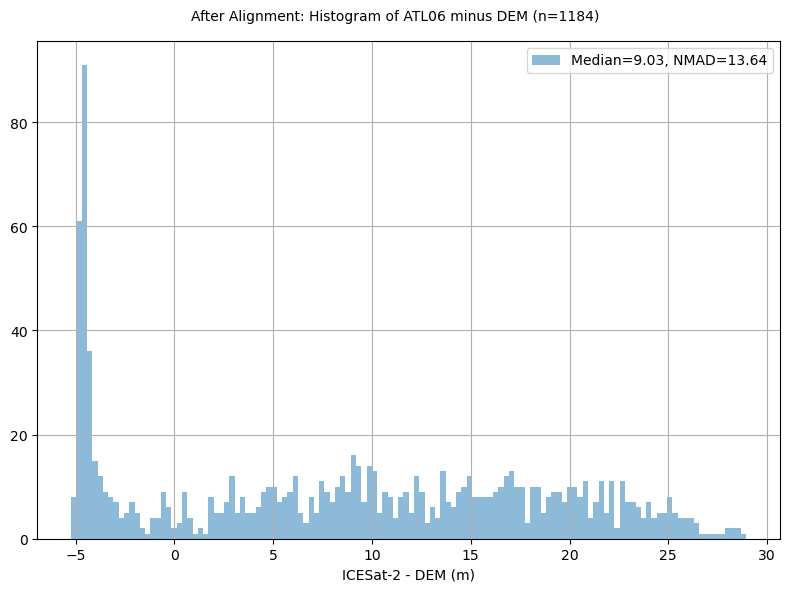

In [64]:
# Collect only the coincident filtereded data again for profile plotting
icesat.filter_atl06sr(
    h_sigma_quantile=0.95,
    mask_worldcover_water=True,
    select_months=[4],
    select_years=[2022],
)

icesat.compare_atl06sr_to_dem(title=f"After Alignment: Mapview of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})", use_aligned_dem=True, **ctx_kwargs)

icesat.histogram(title=f"After Alignment: Histogram of ATL06 minus DEM (n={icesat.atl06sr_filtered.shape[0]})")

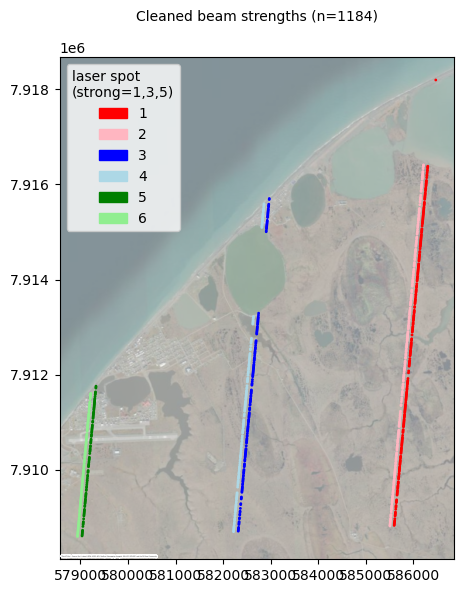

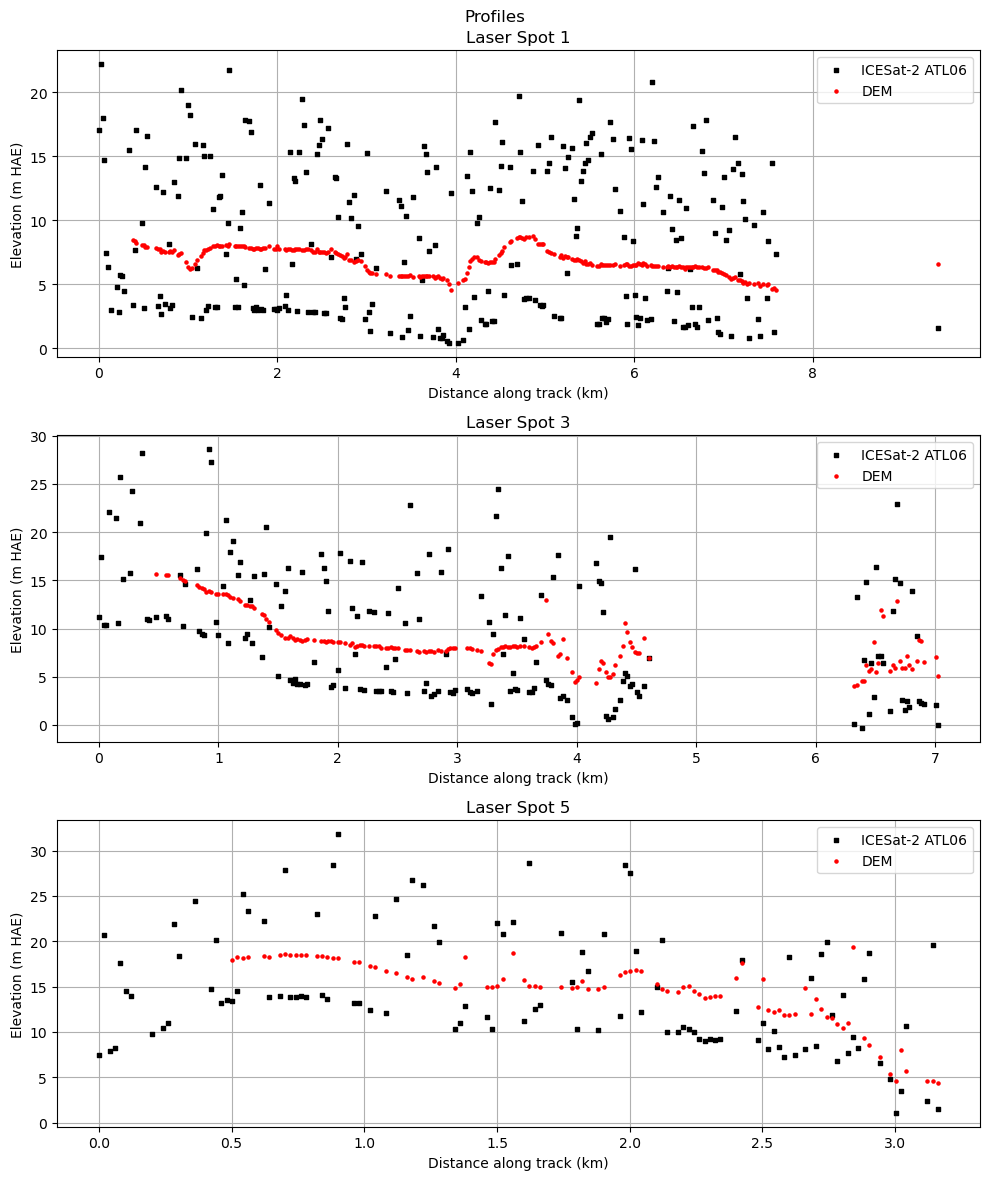

In [65]:
icesat.plot_atl06sr(
    title=f"Cleaned beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
    filtered=True,
    plot_beams=True,
    plot_dem=False,
    map_crs=map_crs,
    **ctx_kwargs
)

icesat.plot_atl06sr_dem_profiles(title="Profiles", only_strong_beams=True)